In [2]:
pwd

'C:\\Users\\Dell'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
data={
    'Dist':['Bidar','Bangalore','Belgaum','Bellary','Bengalore Rural','Kolar','Dharwad','Koppal','Chikmagalur','Chitradurga','Haveri','Chamrajanagar','Mandya','Mysore','Raichur','Kodaku','Hassan','Devanagare','Gulbarga'],
    'Precipitation':[622.438,748.194,1334.194, 574.325,733.003,724.545,1623.548,724.545,1923.742,674.17,1473.343,1334.754,1477.249,2242.378,450.113,1691.933,2200.349,1060.343, 525.402],
    'Min_Temp':[27.643,25.263,21.254,26.407,25.228,25.464,26.148,47.029,26.459,25.214,25.817,25.089,24.567,25.76766667,27.42241667,25.426,25.348,25.509,27.851],
    'Cloud_Cover':[35.241,49.134,39.728,38.466,47.62,47.029,38.267,41.039,44.842,41.364,41.292,50.77,49.54775,50.57941667,35.76258333,46.353,47.12,40.929,35.109],
    'Vapour_pressure':[17.953,21.56, 22.5509,20.008,21.241,20.63,23.652,19.992,24.717,20.82,23.168,23.079,22.234,24.64266667,18.93741667,23.975,24.008,22.042,18.662],
    'Area':[4709,18790,4398,3768,140213,2278,8395,3084,1650,3026,10659,3485,11349,3462,4586,17856,10487,2459,10487],
    'Production':[9043,20981,6054,5903,534214,2759,10986,3952,2958,3325,9865, 4120,18957, 4539,6145,15362,7586,1865,7895]
}


In [3]:
df=pd.DataFrame(data)
df

,Dist,Precipitation,Min_Temp,Cloud_Cover,Vapour_pressure,Area,Production
0,Bidar,622.438,27.643000,35.241000,17.953000,4709,9043
1,Bangalore,748.194,25.263000,49.134000,21.560000,18790,20981
2,Belgaum,1334.194,21.254000,39.728000,22.550900,4398,6054
3,Bellary,574.325,26.407000,38.466000,20.008000,3768,5903
4,Bengalore Rural,733.003,25.228000,47.620000,21.241000,140213,534214
5,Kolar,724.545,25.464000,47.029000,20.630000,2278,2759
6,Dharwad,1623.548,26.148000,38.267000,23.652000,8395,10986
7,Koppal,724.545,47.029000,41.039000,19.992000,3084,3952
8,Chikmagalur,1923.742,26.459000,44.842000,24.717000,1650,2958
9,Chitradurga,674.170,25.214000,41.364000,20.820000,3026,3325


In [4]:
df=df.drop(4)
df.reset_index()                              #dropping the benglore rural row

,index,Dist,Precipitation,Min_Temp,Cloud_Cover,Vapour_pressure,Area,Production
0,0,Bidar,622.438,27.643000,35.241000,17.953000,4709,9043
1,1,Bangalore,748.194,25.263000,49.134000,21.560000,18790,20981
2,2,Belgaum,1334.194,21.254000,39.728000,22.550900,4398,6054
3,3,Bellary,574.325,26.407000,38.466000,20.008000,3768,5903
4,5,Kolar,724.545,25.464000,47.029000,20.630000,2278,2759
5,6,Dharwad,1623.548,26.148000,38.267000,23.652000,8395,10986
6,7,Koppal,724.545,47.029000,41.039000,19.992000,3084,3952
7,8,Chikmagalur,1923.742,26.459000,44.842000,24.717000,1650,2958
8,9,Chitradurga,674.170,25.214000,41.364000,20.820000,3026,3325
9,10,Haveri,1473.343,25.817000,41.292000,23.168000,10659,9865


In [5]:
df.head()

,Dist,Precipitation,Min_Temp,Cloud_Cover,Vapour_pressure,Area,Production
0,Bidar,622.438,27.643,35.241,17.9530,4709,9043
1,Bangalore,748.194,25.263,49.134,21.5600,18790,20981
2,Belgaum,1334.194,21.254,39.728,22.5509,4398,6054
3,Bellary,574.325,26.407,38.466,20.0080,3768,5903
5,Kolar,724.545,25.464,47.029,20.6300,2278,2759


In [6]:
X = df[['Dist', 'Precipitation', 'Min_Temp', 'Cloud_Cover', 'Vapour_pressure', 'Area']]
y = df[['Production']]                                                           #double bracets is used to print the column name
X       

,Dist,Precipitation,Min_Temp,Cloud_Cover,Vapour_pressure,Area
0,Bidar,622.438,27.643000,35.241000,17.953000,4709
1,Bangalore,748.194,25.263000,49.134000,21.560000,18790
2,Belgaum,1334.194,21.254000,39.728000,22.550900,4398
3,Bellary,574.325,26.407000,38.466000,20.008000,3768
5,Kolar,724.545,25.464000,47.029000,20.630000,2278
6,Dharwad,1623.548,26.148000,38.267000,23.652000,8395
7,Koppal,724.545,47.029000,41.039000,19.992000,3084
8,Chikmagalur,1923.742,26.459000,44.842000,24.717000,1650
9,Chitradurga,674.170,25.214000,41.364000,20.820000,3026
10,Haveri,1473.343,25.817000,41.292000,23.168000,10659


In [7]:
y

,Production
0,9043
1,20981
2,6054
3,5903
5,2759
6,10986
7,3952
8,2958
9,3325
10,9865


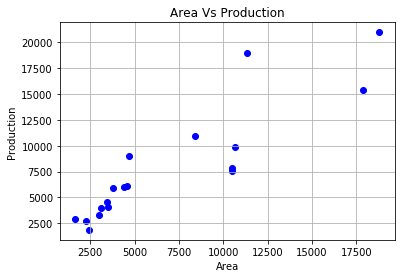

In [8]:
plt.scatter(df['Area'],df['Production'],color='Blue')
plt.title("Area Vs Production")
plt.xlabel("Area")
plt.ylabel("Production")
plt.grid()
plt.show()

In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df[['Area']] 
Y = df['Production']
 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=1)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
                                                                                  # prediction
y_pred=reg.predict(x_test)
print('Predicted Production:',y_pred,'\n')
                                                                                  # Coefficients
print('\nCoefficients: ', reg.coef_,'\n')

                                                                               # R-squared score
print('\nR-squared score: ', r2_score(y_test,y_pred),'\n')
print(y_pred)

Predicted Production: [ 3834.0464198   4561.42499993  5431.30172296  5231.37895532
 19542.87154515  2309.10360706] 


Coefficients:  [1.06341898] 


R-squared score:  0.7865979189963656 

[ 3834.0464198   4561.42499993  5431.30172296  5231.37895532
 19542.87154515  2309.10360706]


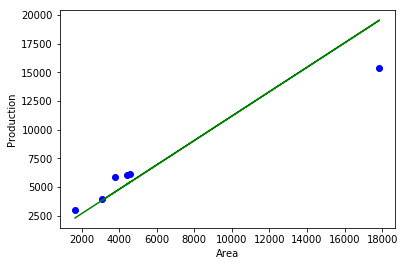

In [10]:
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,y_pred, color='green')                                     #Area vs production graph
plt.xlabel('Area')
plt.ylabel('Production')

plt.show()

In [11]:
X = df[['Area']] 
Y = df['Production']
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf = clf.fit(X, y)
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=1)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')


In [13]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
y_pred =  clf.predict(x_test)                                     #Predicting labels on the test set.

In [15]:
from sklearn.metrics import accuracy_score                    #Importing the accuracy metric from sklearn.metrics library
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))


Accuracy Score on train data:  0.9166666666666666
Accuracy Score on test data:  0.0


In [16]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
clf.fit(x_train, y_train)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))

Accuracy Score on train data:  0.08333333333333333
Accuracy Score on the test data:  0.0


In [17]:
X = df[['Area']]
Y = df['Production']
from sklearn import metrics
clf = DecisionTreeClassifier()                                                                       #to print the confusion matrix
clf.fit(X,Y)
y_pred=clf.predict(X)

print('Accuracy of the classifer is:',accuracy_score(y,y_pred))
print("\n")
print( metrics.classification_report(y,y_pred))
print('y_pred')
print(y_pred)


Accuracy of the classifer is: 0.9444444444444444


              precision    recall  f1-score   support

        1865       1.00      1.00      1.00         1
        2759       1.00      1.00      1.00         1
        2958       1.00      1.00      1.00         1
        3325       1.00      1.00      1.00         1
        3952       1.00      1.00      1.00         1
        4120       1.00      1.00      1.00         1
        4539       1.00      1.00      1.00         1
        5903       1.00      1.00      1.00         1
        6054       1.00      1.00      1.00         1
        6145       1.00      1.00      1.00         1
        7586       0.50      1.00      0.67         1
        7895       0.00      0.00      0.00         1
        9043       1.00      1.00      1.00         1
        9865       1.00      1.00      1.00         1
       10986       1.00      1.00      1.00         1
       15362       1.00      1.00      1.00         1
       18957       1.00      1

C:\anconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\anconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\anconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
